TASK:

Price A: 200 - conversion; 23539 - no conversion<br>
Price B: 182 - conversion; 22406 - no conversion<br>

Is there difference between conversions?<br> 
Is it due to chance?

Observed difference of conversions: 0.0368


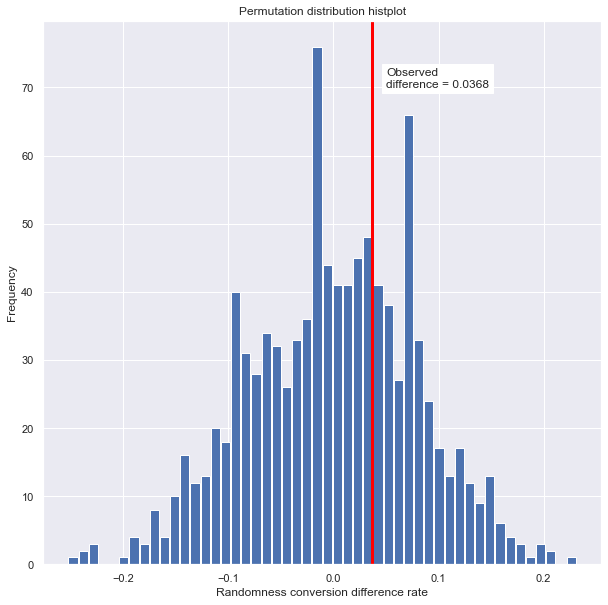

p-Value = 0.33


In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

nA = 23539+200
nB = 22406+182
obs_dif = 100*(200/nA-182/nB)
print(f'Observed difference of conversions: {obs_dif:.4f}')
conversion = [0]*(23539+22406)
conversion.extend([1]*(200+182))
conversion = pd.Series(conversion)

def perm_func(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n))-idx_B
    return x.loc[idx_B].mean()-x.loc[idx_A].mean()

R=1000
perm_diffs = [100*perm_func(conversion, nA, nB) for _ in range(R)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.hist(perm_diffs, bins=50, rwidth=0.9)
ax.axvline(obs_dif, color='red', lw=3)
ax.text(0.05, 70, f'Observed\ndifference = {obs_dif:.4f}', bbox = {'facecolor':'white'})
ax.set_xlabel('Randomness conversion difference rate')
ax.set_ylabel('Frequency')
plt.title('Permutation distribution histplot')
plt.show()

p_val = np.mean([diff>obs_dif for diff in perm_diffs])
print(f'p-Value = {p_val}')

In [43]:
# Calculate p-Value without Permutation test:

"""
    In the case above, we don't need to use Permutation test for calculate
    p-Value. As we have Binomial distribution (0 & 1), we can aproximate it 
    with Normal distribution using function 'stats.chi2_contingency' 
    which apply values from data above.
"""

import numpy as np
from scipy import stats

survivors = np.array([[200, 23539], [182, 22406]])
chi2, p_value, df, _ = stats.chi2_contingency(survivors)
p_value /= 2
print(f'p-Value = {p_value:.4f}')obs_dif

p-Value = 0.3498


In [50]:
"""
p-Value calculated by Permutation test is almost equal p-Value
calculated by aproximating Normal distribution.
"""
print('p-Value (Permutation test):', p_val)
print(f'p-Value (aproximating the Normal distribution): {p_value:.4f}')

p-Value (Permutation test): 0.323
p-Value (aproximating the Normal distribution): 0.3498


Conclusion: p-Values gets by Permutation test and chi2-test shows that randomness can generate more limit results that observed difference.